In [2]:
import json
import random
import numpy as np
from networkx import nx
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy.spatial import distance_matrix
from scipy import stats
from sklearn.decomposition import PCA, IncrementalPCA
from collections import Counter, defaultdict
random.seed(0)
np.random.seed(0)

### PCA-2 glove50K

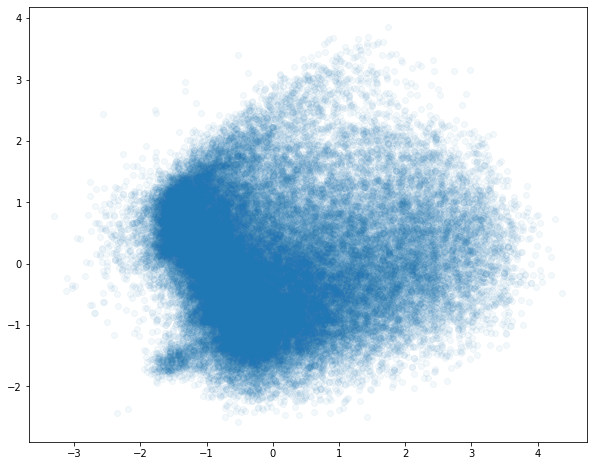

### t-SNE glove50K

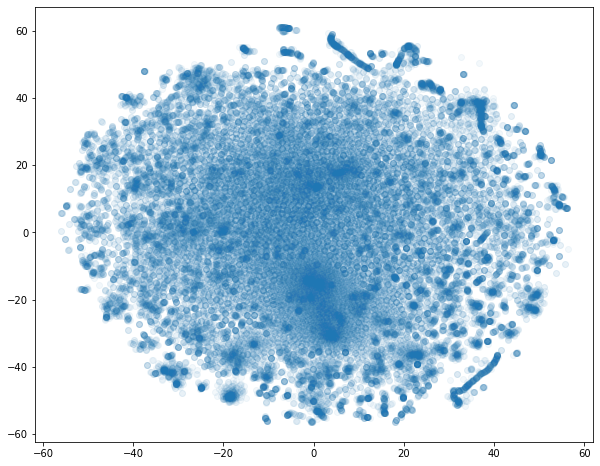



In [60]:
NAXIS = 30
fn = 'ft50k.txt'
prefix = 'ft50k'

idx2w = []
X = []
for idx, line in enumerate(open(fn,encoding='utf-8')):
    if not idx: continue # skip headers
    chunks = line.rstrip('\n').rstrip(' ').split(' ')
    idx2w.append( chunks[0] )
    X.append( list(map(float,chunks[1:])) )
X = np.array(X)
pca = PCA(n_components=NAXIS, svd_solver='full')
pca.fit(X)
print('explained_variance_ratio', sum(pca.explained_variance_ratio_))

with open(f'{prefix}.pca.var.json','w') as fh:
    fh.write(json.dumps(pca.explained_variance_ratio_.tolist()))

acc = 0.
for idx,val in enumerate(pca.explained_variance_ratio_):
    acc += val
    print(f'{idx}\t{val}\t{acc}')


# with open(f'{prefix}.poles_data.json','w') as fh:
#     fh.write(json.dumps(poles_data))

explained_variance_ratio 0.29322593073555553
0	0.04046617166435671	0.04046617166435671
1	0.026324007281810224	0.06679017894616693
2	0.01817070328590871	0.08496088223207564
3	0.015804845907504486	0.10076572813958012
4	0.013889038476652734	0.11465476661623286
5	0.012423252085815753	0.1270780187020486
6	0.011432057044645547	0.13851007574669416
7	0.010597509814642853	0.14910758556133702
8	0.01018840698770504	0.15929599254904206
9	0.009717177280548533	0.16901316982959058
10	0.008826451707484388	0.17783962153707497
11	0.008342760842977408	0.18618238238005239
12	0.007863533409932752	0.19404591578998515
13	0.0072122465069047155	0.20125816229688986
14	0.006921592082983749	0.20817975437987363
15	0.006786120188576293	0.21496587456844993
16	0.0065904954193884025	0.22155636998783834
17	0.006315595326930635	0.22787196531476897
18	0.006050976866323905	0.23392294218109289
19	0.005834324415476604	0.23975726659656948
20	0.00574963727660402	0.2455069038731735
21	0.0057092098057307675	0.2512161136789043
2

In [61]:
PRC = 0.5

# poles = dict()
poles_data = dict()
Y = pca.transform(X)

for AXIS in range(NAXIS):
    Z = Y[:,AXIS]
    ranks = [stats.percentileofscore(Z, a, 'rank') for a in Z]
    poles_data[f"dim{AXIS}north"] = [(idx,r) for idx, r in enumerate(ranks) if r<=PRC]
    poles_data[f"dim{AXIS}south"] = [(idx,100.-r) for idx, r in enumerate(ranks) if r>=100.-PRC]

    print(f"dim{AXIS}north")
    print([idx2w[x] for x,r in poles_data[f"dim{AXIS}north"]])
    print(f"dim{AXIS}south")
    print([idx2w[x] for x,r in poles_data[f"dim{AXIS}south"]])
    print()

with open(f'{prefix}.poles_data.json','w') as fh:
    fh.write(json.dumps(poles_data))

dim0north
['joined', 'supported', 'introduced', 'reduced', 'conducted', 'reduce', 'carried', 'affect', 'rejected', 'opposed', 'referred', 'pushed', 'backed', 'enhanced', 'praised', 'welcomed', 'enhance', 'criticized', 'affecting', 'imposed', 'violated', 'influenced', 'dominated', 'damaging', 'attracted', 'defended', 'violate', 'blamed', 'accompanied', 'depends', 'strengthen', 'reduces', 'endorsed', 'lacked', 'dealt', 'impose', 'favored', 'violates', 'triggered', 'characterized', 'rely', 'enhancing', 'shifted', 'improves', 'exceeded', 'lowered', 'depend', 'strengthened', 'embraced', 'restrict', 'swept', 'reminded', 'disrupt', 'undermine', 'topped', 'knocked', 'sparked', 'rid', 'resemble', 'upheld', 'termed', 'compares', 'exceeds', 'favoured', 'undermining', 'stripped', 'denounced', 'resembles', 'undergo', 'halted', 'underwent', 'disrupted', 'aided', 'echoed', 'undergoing', 'facilitated', 'disrupting', 'boosted', 'undermined', 'plunged', 'breached', 'benefited', 'relies', 'slammed', 'rip

dim2north
['Miliband', 'Clegg', 'Farage', 'Rooney', 'Salmond', 'Federer', 'Netanyahu', 'Nadal', 'Ronaldo', 'Djokovic', 'Wenger', 'Mourinho', 'Sarkozy', 'Karzai', 'Moyes', 'Gove', 'Suarez', 'Messi', 'Berlusconi', 'Hollande', 'Beckham', 'Rubio', 'Musharraf', 'Mugabe', 'Gillard', 'Pistorius', 'Essendon', 'McIlroy', 'Erdogan', 'Hibs', 'Milliband', 'Morsi', 'Vettel', 'Assange', 'Yanukovych', 'Gadhafi', 'Blatter', 'Pietersen', 'Lampard', 'Sharapova', 'Mickelson', 'Maliki', 'Chávez', 'Corbyn', 'Mayweather', 'Thaksin', 'Mancini', 'Savile', 'Poroshenko', 'Neymar', 'Benitez', 'Pacquiao', 'Capello', 'Juncker', 'Sturridge', 'Balotelli', 'Drogba', 'Osbourne', 'Sharpton', 'Khamenei', 'Redknapp', 'Maduro', 'Rosberg', 'Zelaya', 'Jeter', 'Giggs', 'Zuckerberg', 'Roddick', 'Olmert', 'Zardari', 'Tymoshenko', 'Mandelson', 'Fabregas', 'Yanukovich', 'Ivanovic', 'Suárez', 'Strauss-Kahn', 'Tsarnaev', 'Trott', 'Tsipras', 'Wilshere', 'Pellegrini', 'Uribe', 'Aguero', 'Hayne', 'Pardew', 'Tevez', 'Tebow', 'Syriza',

dim4north
['important.svg', 'viral', 'systemic', 'Clinical', 'nuvola.svg', '--XLinkBot', 'Visual', 'InternetArchiveBot', 'Critical', 'Pure', 'Unicode', 'Biological', 'Sexual', 'Specific', 'nofollow', 'Molecular', 'Weak', 'Serious', 'metabolic', 'electromagnetic', 'Intelligent', 'Positive', 'Solid', 'Significant', 'Stupid', 'addictive', 'esoteric', 'Mathematical', 'nonlinear', 'Soft', 'basal', 'Jim1138', 'pathological', 'Negative', 'algebraic', 'Genetic', 'Huge', 'Practical', 'Increasing', 'microbial', 'divergent', 'exponential', 'anal', 'Regulatory', 'Increased', 'Psychological', 'Liquid', 'Inappropriate', 'Artificial', 'Structural', 'Protein', 'Cognitive', 'Cosmic', 'macroeconomic', 'reusable', 'deterministic', 'Racial', 'Hydrogen', 'Ethical', 'Monetary', 'Functional', 'visceral', 'Linear', 'Reducing', 'Magnetic', 'non-linear', 'Behavioral', 'syntactic', 'Innovative', 'stochastic', 'dropdown', 'asynchronous', 'hormonal', 'Ecological', 'regressive', 'recursive', 'Philosophical', 'topol

dim6north
['provide', 'design', 'production', 'release', 'create', 'produce', 'creating', 'developing', 'bring', 'receive', 'reach', 'store', 'supply', 'develop', 'transfer', 'build', 'Green', 'identify', 'drop', 'shape', 'distribution', 'spring', 'recovery', 'reduce', 'launch', 'draw', 'sell', 'flow', 'gain', 'transport', 'purchase', 'producing', 'carry', 'perform', 'raise', 'processing', 'determine', 'carrying', 'enter', 'delivery', 'sharing', 'finish', 'storage', 'frame', 'manufacturing', 'achieve', 'ride', 'reaching', 'chain', 'establish', 'capture', 'cutting', 'deliver', 'entering', 'handling', 'wear', 'fill', 'feed', 'implement', 'reduction', 'formation', 'Water', 'obtain', 'transmission', 'repair', 'steel', 'establishing', 'crossing', 'explore', 'pull', 'lift', 'yield', 'generate', 'delivering', 'introduce', 'Wood', 'forming', 'collecting', 'collect', 'examine', 'feeding', 'bearing', 'tackle', 'achieving', 'motor', 'cleaning', 'lighting', 'Gray', 'measuring', 'deposit', 'wire', 

dim8north
['University', 'State', 'National', 'established', 'financial', 'Government', 'District', 'institutions', 'citizens', 'elections', 'governments', 'serving', 'San', 'founded', 'Federal', 'appointed', 'organized', 'Conference', 'joining', 'Democratic', 'cooperation', 'Community', 'Islamic', 'visiting', 'urged', 'attending', 'establishing', 'Schools', 'Province', 'governance', 'Ministry', 'Federation', 'participating', 'Region', 'founding', 'Financial', 'Regional', 'organizing', 'provincial', 'Economic', 'Finance', 'gaining', 'pursuing', 'strengthening', 'advancing', 'municipalities', 'delegation', 'affiliated', 'securing', 'Greater', 'NGOs', 'defeating', 'assisting', 'stakeholders', 'Metropolitan', 'granting', 'governors', 'rebuilding', 'Lebanese', 'Universities', 'Puerto', 'Rural', 'Governments', 'Municipality', 'Educational', 'co-operation', 'Citizens', 'Leaders', 'fulfilling', 'businessmen', 'governed', 'educating', 'Elections', 'Municipal', 'Indigenous', 'Communities', 'ove

KeyboardInterrupt: 

In [62]:
with open(f'{prefix}.poles_data.json','w') as fh:
    fh.write(json.dumps(poles_data))

In [63]:
# NAXIS = 200
fn = 'ft50k.txt'
prefix = 'ft50k'

idx2w = []
X = []
for idx, line in enumerate(open(fn,encoding='utf-8')):
    if not idx: continue # skip headers
    chunks = line.rstrip('\n').rstrip(' ').split(' ')
    idx2w.append( chunks[0] )
    X.append( list(map(float,chunks[1:])) )
X = np.array(X)

with open(f'{prefix}.poles_data.json') as fh:
    poles_data = json.loads(fh.read()) 


Merged nodes: 6
Merged components: 3
#### {'dim2north', 'dim0south'}
{'Megrahi', 'Essendon', 'Henin', 'Montgomerie', 'Redknapp', 'Hird', 'Tsvangirai', 'Wilshere', 'Kyrgios', 'Clijsters', 'Bergdahl', 'Morsi', 'Earnhardt', 'Starc', 'Robben', 'Jeter', 'Lukaku', 'Goodell', 'Raikkonen', 'Fellaini', 'Trott', 'Pietersen', 'Pardew', 'Adebayor', 'Falcao', 'Dimon', 'Mickelson', 'Kvitova', 'Goodes', 'Sturridge', 'Rouhani', 'Vettel', 'Capello', 'Ecclestone', 'Guardiola', 'Loughner', 'Savile', 'Tomic', 'Contador', 'Rajaratnam', 'Depp', 'Landrieu', 'Yellen', 'Davydenko', 'Robinho', 'Froome', 'Tevez', 'Icahn', 'Aguero', 'Smalling', 'Wozniacki', 'Ozil', 'Ouattara', 'Berdych', 'Blagojevich', 'Gasquet', 'Nadal', 'Ricciardo', 'Brees', 'Federer', 'Sharapova', 'Gallen', 'Mourinho', 'Ancelotti', 'Gbagbo', 'Draghi', 'McChrystal', 'Netanyahu', 'Benítez', 'Flintoff', 'Roddick', 'Zelaya', 'Folau', 'Gatland', 'Spieth', 'Azarenka', 'Pettitte', 'Ballmer', 'Stosur', 'Djokovic', 'Rosberg', 'Pulis', 'Nowitzki', 'Vill

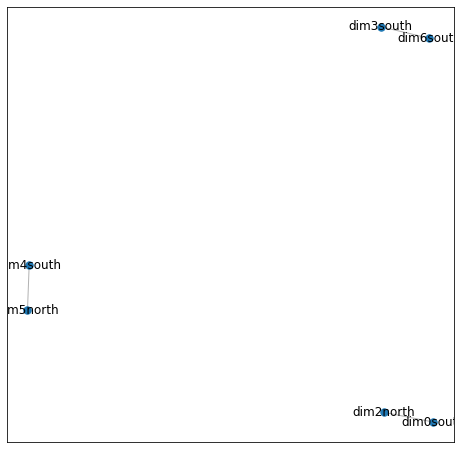

deleted set()
merged {('dim2north', 'dim0south'): {'Megrahi', 'Essendon', 'Henin', 'Montgomerie', 'Redknapp', 'Hird', 'Tsvangirai', 'Wilshere', 'Kyrgios', 'Clijsters', 'Bergdahl', 'Morsi', 'Earnhardt', 'Starc', 'Robben', 'Jeter', 'Lukaku', 'Goodell', 'Raikkonen', 'Fellaini', 'Trott', 'Pietersen', 'Pardew', 'Adebayor', 'Falcao', 'Dimon', 'Mickelson', 'Kvitova', 'Goodes', 'Sturridge', 'Rouhani', 'Vettel', 'Capello', 'Ecclestone', 'Guardiola', 'Loughner', 'Savile', 'Tomic', 'Contador', 'Rajaratnam', 'Depp', 'Landrieu', 'Yellen', 'Davydenko', 'Robinho', 'Froome', 'Tevez', 'Icahn', 'Aguero', 'Smalling', 'Wozniacki', 'Ozil', 'Ouattara', 'Berdych', 'Blagojevich', 'Gasquet', 'Nadal', 'Ricciardo', 'Brees', 'Federer', 'Sharapova', 'Gallen', 'Mourinho', 'Ancelotti', 'Gbagbo', 'Draghi', 'McChrystal', 'Netanyahu', 'Benítez', 'Flintoff', 'Roddick', 'Zelaya', 'Folau', 'Gatland', 'Spieth', 'Azarenka', 'Pettitte', 'Ballmer', 'Stosur', 'Djokovic', 'Rosberg', 'Pulis', 'Nowitzki', 'Villas-Boas', 'Berbatov

In [64]:
TH = 0.10
#TH = 0.04
    
def intersect_words(p):
    words = set([idx2w[x] for x,r in poles_data[list(p)[0]]])
    for q in p:
        words &= set([idx2w[x] for x,r in poles_data[q]])
    return words
    
G=nx.Graph()

deleted = set()
merged = dict()
    
poles_keys = list(sorted(poles_data.keys()))
for i1 in range(len(poles_keys)):
    k1 = poles_keys[i1]
    pole1_words = set([idx2w[x] for x,r in poles_data[k1]])
    for i2 in range(i1+1,len(poles_keys)):
        k2 = poles_keys[i2]
        pole2_words = set([idx2w[x] for x,r in poles_data[k2]])
        if len(pole1_words&pole2_words)/min(len(pole1_words), len(pole2_words))>TH:
            G.add_edge(k1,k2)
    
print('Merged nodes:', len(G.nodes()))
print('Merged components:', len(list(nx.connected_components(G))))
for p in nx.connected_components(G):
    print('####',p)
    words = intersect_words(p)
    print(words)
    if len(words)<5:
        print('DEBUG')
        print(list(nx.bridges(G.subgraph(p))))
        print(nx.betweenness_centrality(G.subgraph(p)))
        nx.draw(G.subgraph(p))
        plt.show()
        top_centrality = list(sorted(nx.betweenness_centrality(G.subgraph(p)).items(), key=lambda x:-x[1]))
        print('delete most central', top_centrality[0])
        deleted.add( top_centrality[0][0] )

        BG = G.subgraph(set(p)-set([top_centrality[0][0]]))
        nx.draw(BG)
        plt.show()
        for pp in nx.connected_components(BG):
            if len(pp)>1:
                print('????', pp)
                print(intersect_words(pp))
                print()
            else:
                deleted.add( list(pp)[0] )
    else:
        merged[tuple(p)] = words
        
    print()
    
print(pos)
print(len(pos))
pos = nx.spring_layout(G)
# nx.draw(G)

# plt.rcParams["text.usetex"] = False
plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, alpha=0.3) # , width=edgewidth, edge_color="m")
nx.draw_networkx_nodes(G, pos, node_size=55) # , node_size=nodesize, node_color="w", alpha=0.4)
nx.draw_networkx_labels(G, pos) #, font_size=14)
# # nodesize = [wins[v] * 50 for v in H]
# nx.draw_networkx_nodes(H, pos, node_size=nodesize, node_color="w", alpha=0.4)
# nx.draw_networkx_edges(H, pos, alpha=0.4, node_size=0, width=1, edge_color="k")
# font = {"fontname": "Helvetica", "color": "k", "fontweight": "bold", "fontsize": 14}
# plt.title("World Chess Championship Games: 1886 - 1985", font)

plt.show()

print('deleted', deleted)
print('merged', merged)

In [69]:
skip = set()
for key in merged:
    skip |= set(key)

current = merged.copy()
# poles_keys = list(sorted(poles_data.keys()))
for pole_key, pole_words in poles_data.items():
    if pole_key not in skip and pole_key not in deleted:
        current[(pole_key,)] = set([idx2w[x] for x,r in pole_words[:5]])

print(current)

pole_vectors = dict()
for pole, words in current.items():
    pole_vector = np.median(np.array([ X[idx2w.index(w)].tolist() for w in words]), axis=0)
    pole_vectors[ pole ] =  pole_vector

print(pole_vectors)


{('dim2north', 'dim0south'): {'Megrahi', 'Essendon', 'Henin', 'Montgomerie', 'Redknapp', 'Hird', 'Tsvangirai', 'Wilshere', 'Kyrgios', 'Clijsters', 'Bergdahl', 'Morsi', 'Earnhardt', 'Starc', 'Robben', 'Jeter', 'Lukaku', 'Goodell', 'Raikkonen', 'Fellaini', 'Trott', 'Pietersen', 'Pardew', 'Adebayor', 'Falcao', 'Dimon', 'Mickelson', 'Kvitova', 'Goodes', 'Sturridge', 'Rouhani', 'Vettel', 'Capello', 'Ecclestone', 'Guardiola', 'Loughner', 'Savile', 'Tomic', 'Contador', 'Rajaratnam', 'Depp', 'Landrieu', 'Yellen', 'Davydenko', 'Robinho', 'Froome', 'Tevez', 'Icahn', 'Aguero', 'Smalling', 'Wozniacki', 'Ozil', 'Ouattara', 'Berdych', 'Blagojevich', 'Gasquet', 'Nadal', 'Ricciardo', 'Brees', 'Federer', 'Sharapova', 'Gallen', 'Mourinho', 'Ancelotti', 'Gbagbo', 'Draghi', 'McChrystal', 'Netanyahu', 'Benítez', 'Flintoff', 'Roddick', 'Zelaya', 'Folau', 'Gatland', 'Spieth', 'Azarenka', 'Pettitte', 'Ballmer', 'Stosur', 'Djokovic', 'Rosberg', 'Pulis', 'Nowitzki', 'Villas-Boas', 'Berbatov', 'Cech', 'Ponting',

In [203]:
# n-simplex volume
# based on Cayley-Menger Determinant
# https://github.com/cthurau/pymf/blob/master/pymf/base.py

def cmdet(d):
    """ Returns the Volume of a simplex computed via the Cayley-Menger
    determinant.
    Arguments
    ---------
    d - euclidean distance matrix (shouldn't be squared)
    Returns
    -------
    V - volume of the simplex given by d
    """
    D = np.ones((d.shape[0]+1,d.shape[0]+1))
    D[0,0] = 0.0
    D[1:,1:] = d**2
    j = np.float32(D.shape[0]-2)
    f1 = (-1.0)**(j+1) / ( (2**j) * ((factorial(j))**2))
    cmd = f1 * np.linalg.det(D)

    # sometimes, for very small values, "cmd" might be negative, thus we take
    # the absolute value
    return np.sqrt(np.abs(cmd))

np.random.seed(0)
poles_fixed_order = list(pole_vectors.items())

volume_stats = dict()
for idx1 in range(len(poles_fixed_order)):
    cstats = []
    for _ in range(5):
        idx2 = np.random.choice(range(len(poles_fixed_order)))
        idx3 = np.random.choice(range(len(poles_fixed_order)))
        if idx1 == idx2 or idx1 == idx3 or idx2 == idx3:
            continue

        simplex_pca = PCA(n_components=2, svd_solver='full')
        cur_poles = np.array([poles_fixed_order[idx1][1],poles_fixed_order[idx2][1],poles_fixed_order[idx3][1]])
        simplex_pca.fit(cur_poles)
        corners = simplex_pca.transform(cur_poles)
        d = distance_matrix(corners,corners)
        simplex_volume = cmdet(d)
        Xp = simplex_pca.transform(X[::25])
        s = np.concatenate([Xp,corners], axis=0)
        d = distance_matrix(s,s)
        EPS = 1e-5
        t = 0
        o = 0
        scale = list(range(-3,0))
        for idx in range(d.shape[0]-3):
            left = simplex_volume
            for rep in range(3):
                mask = scale[:]
                mask[rep] = idx
                sd = d[np.ix_(mask,mask)]
                v = cmdet(sd)
                left -= v
            t += 1
            if left<-EPS:
                o += 1
        cstats.append( o/t )
    print(f'{np.mean(cstats):.1%}\t{poles_fixed_order[idx1][0]}')
    volume_stats[poles_fixed_order[idx1][0]] = np.mean(cstats)
#     break

with open(f'{prefix}.volume_stats.json','w') as fh:
    fh.write(json.dumps(list(volume_stats.items())))



0.9%	('dim10south', 'dim81south')
0.7%	('dim72north', 'dim117north')
3.0%	('dim125north', 'dim137south')
0.5%	('dim128south', 'dim141south')
0.9%	('dim139north', 'dim35south')
3.3%	('dim145north', 'dim152south')
1.5%	('dim154south', 'dim159south')
1.2%	('dim165north', 'dim87south')
1.2%	('dim182north', 'dim169south')
1.1%	('dim185north', 'dim99south')
0.9%	('dim53north', 'dim86south')
1.6%	('dim82south', 'dim71south')
3.4%	('dim0north',)
2.6%	('dim1north',)
3.0%	('dim1south',)
0.9%	('dim2north',)
0.9%	('dim2south',)
2.3%	('dim3north',)
0.9%	('dim3south',)
1.3%	('dim4north',)
3.0%	('dim4south',)
1.2%	('dim5north',)
1.1%	('dim5south',)
1.9%	('dim6north',)
2.7%	('dim6south',)
1.4%	('dim7north',)
1.8%	('dim7south',)
1.1%	('dim8north',)
3.5%	('dim8south',)
1.6%	('dim9north',)
1.6%	('dim9south',)
0.3%	('dim10north',)
0.8%	('dim11north',)
0.6%	('dim11south',)
0.9%	('dim12north',)
3.0%	('dim12south',)
1.1%	('dim13north',)
2.7%	('dim13south',)
7.5%	('dim14north',)
1.4%	('dim14south',)
0.8%	('di

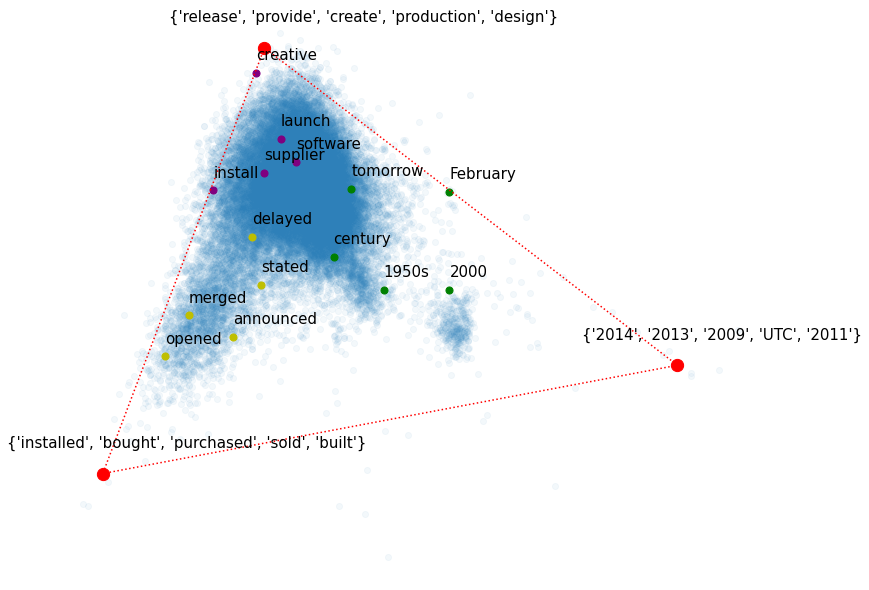

In [98]:
poles_fixed_order = list(pole_vectors.items())

# n1,v1 = poles_fixed_order[0]
# n2,v2 = poles_fixed_order[1]
# n3,v3 = poles_fixed_order[2]
n1,v1 = poles_fixed_order[14]
n2,v2 = poles_fixed_order[10]
n3,v3 = poles_fixed_order[12]


plane_pca = PCA(n_components=2, svd_solver='full')
corners = plane_pca.fit_transform([v1,v2,v3])

projections = plane_pca.transform(X)

fig = plt.figure(1, figsize=(10, 8))
# fig, ax = plt.subplots()
# ax.axis("off")
plt.clf()

ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.scatter(projections[:, 0], projections[:, 1], alpha=.05)

for idx1 in range(len(corners)):
    for idx2 in range(len(corners)):
        if idx1<idx2:
            ax.plot([corners[idx1][0],corners[idx2][0]], [corners[idx1][1],corners[idx2][1]], c= "red", marker='.', linestyle=':')
ax.scatter(corners[:,0], corners[:,1], c='r', s=150)

for name, loc in zip([current[n1],current[n2],current[n3]], corners):
    ax.text(loc[0]-.5, loc[1]+0.1, str(name), fontsize=15) # , size=20, zorder=1, color='k') 

tx = []
ty = []
terms = ('2000', '1950s', 'century', 'February', 'tomorrow')
# terms = ('bible', 'God', 'prophet', 'Christian', 'Satan')
for t in terms:
    idx = idx2w.index(t)
    tx.append( projections[idx, 0] )
    ty.append( projections[idx, 1] )
ax.scatter(tx, ty, c='g', s=50)
for name, ctx, cty in zip(terms, tx, ty):
    ax.text(ctx, cty+0.05, name, fontsize=15) 
    
tx = []
ty = []
terms = ('stated', 'announced', 'opened', 'delayed', 'merged')
for t in terms:
    idx = idx2w.index(t)
    tx.append( projections[idx, 0] )
    ty.append( projections[idx, 1] )
ax.scatter(tx, ty, c='y', s=50)
for name, ctx, cty in zip(terms, tx, ty):
    ax.text(ctx, cty+0.05, name, fontsize=15) 

tx = []
ty = []
terms = ('supplier', 'launch', 'software', 'install', 'creative')
for t in terms:
    idx = idx2w.index(t)
    tx.append( projections[idx, 0] )
    ty.append( projections[idx, 1] )
ax.scatter(tx, ty, c='purple', s=50)
for name, ctx, cty in zip(terms, tx, ty):
    ax.text(ctx, cty+0.05, name, fontsize=15) 


plt.show()

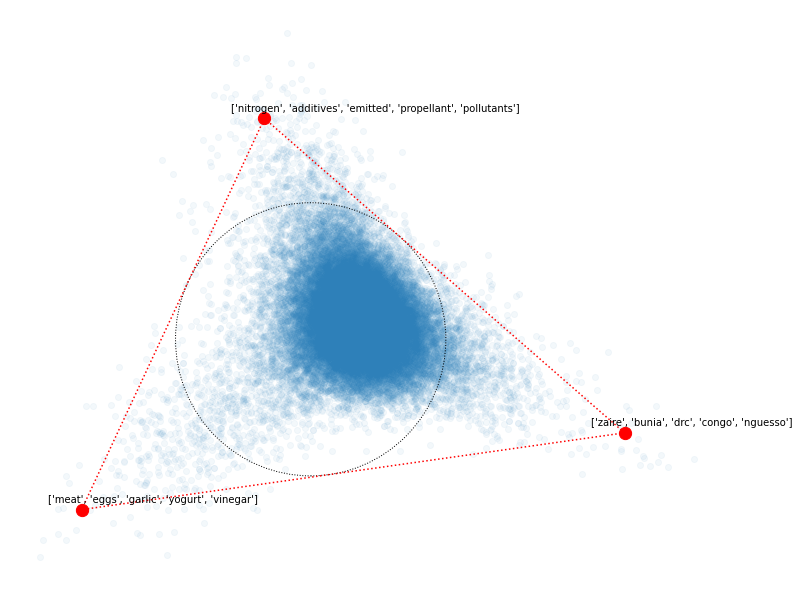

Inner cloud: 95.9%


In [23]:
poles_fixed_order = list(pole_vectors.items())

n1,v1 = poles_fixed_order[23]
n2,v2 = poles_fixed_order[20]
n3,v3 = poles_fixed_order[12]

n1,v1 = poles_fixed_order[6]
n2,v2 = poles_fixed_order[1]
n3,v3 = poles_fixed_order[2]

plane_pca = PCA(n_components=2, svd_solver='full')
corners = plane_pca.fit_transform([v1,v2,v3])

projections = plane_pca.transform(X)

fig = plt.figure(1, figsize=(10, 8))
plt.clf()

ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.scatter(projections[:, 0], projections[:, 1], alpha=.05)

for idx1 in range(len(corners)):
    for idx2 in range(len(corners)):
        if idx1<idx2:
            ax.plot([corners[idx1][0],corners[idx2][0]], [corners[idx1][1],corners[idx2][1]], c= "red", marker='.', linestyle=':')
ax.scatter(corners[:,0], corners[:,1], c='r', s=150)

for name, loc in zip([current[n1],current[n2],current[n3]], corners):
    ax.text(loc[0]-.5, loc[1]+0.1, str(list(name)[:5])) # , size=20, zorder=1, color='k') 

side_a = np.linalg.norm(corners[0]-corners[1])
side_b = np.linalg.norm(corners[1]-corners[2])
side_c = np.linalg.norm(corners[2]-corners[0])

halfperimeter = (side_a+side_b+side_c)/2.
incenter = (corners[0]*side_b+corners[1]*side_c+corners[2]*side_a)/(2.*halfperimeter)
area = np.sqrt(halfperimeter*(halfperimeter-side_a)*(halfperimeter-side_b)*(halfperimeter-side_c))
radius = area/halfperimeter

# print(halfperimeter)
# print(incenter)
# print(radius)

circle = plt.Circle(incenter, radius, color='k', linestyle=':', fill=False)

ax.add_patch(circle)

plt.show()

distances = distance_matrix([incenter],projections)
insiders = (distances[0]<=radius)
print(f'Inner cloud: {insiders.sum()/distances.shape[1]:.1%}')


In [100]:
np.random.seed(0)
poles_fixed_order = list(pole_vectors.items())

volume_stats = dict()
vsl = []
for idx1 in range(len(poles_fixed_order)):
    cstats = []
    for _ in range(5):
        idx2 = np.random.choice(range(len(poles_fixed_order)))
        idx3 = np.random.choice(range(len(poles_fixed_order)))
        if idx1 == idx2 or idx1 == idx3 or idx2 == idx3:
            continue

        plane_pca = PCA(n_components=2, svd_solver='full')
        corners = np.array([poles_fixed_order[idx1][1],poles_fixed_order[idx2][1],poles_fixed_order[idx3][1]])
        plane_pca.fit(corners)
        corners = plane_pca.transform(corners)

        projections = plane_pca.transform(X)

        side_a = np.linalg.norm(corners[0]-corners[1])
        side_b = np.linalg.norm(corners[1]-corners[2])
        side_c = np.linalg.norm(corners[2]-corners[0])

        halfperimeter = (side_a+side_b+side_c)/2.
        incenter = (corners[0]*side_b+corners[1]*side_c+corners[2]*side_a)/(2.*halfperimeter)
        area = np.sqrt(halfperimeter*(halfperimeter-side_a)*(halfperimeter-side_b)*(halfperimeter-side_c))
        radius = area/halfperimeter

        distances = distance_matrix([incenter],projections)
        insiders = (distances[0]<=radius)
#         print(f'Inner cloud: {insiders.sum()/distances.shape[1]:.1%}')

        cstats.append( insiders.sum()/distances.shape[1] )
    print(f'{np.mean(cstats):.1%}\t{poles_fixed_order[idx1][0]}')
    vsl.append(np.mean(cstats))
    print(np.mean(vsl))
    volume_stats[poles_fixed_order[idx1][0]] = np.mean(cstats)
    


91.2%	('dim2north', 'dim0south')
0.9123482469649393
86.6%	('dim3south', 'dim6south')
0.8892677853557072
90.8%	('dim4south', 'dim5north')
0.895409574858164
90.4%	('dim0north',)
0.8975317006340128
85.8%	('dim1north',)
0.8896127922558452
76.8%	('dim1south',)
0.8692778855577113
86.0%	('dim2south',)
0.8680057886872025
89.1%	('dim3north',)
0.8709307936158723
94.0%	('dim4north',)
0.8786419061714568
93.9%	('dim5south',)
0.8846645932918659
91.9%	('dim6north',)
0.8877794828623845
89.7%	('dim7north',)
0.888557687820423
69.7%	('dim7south',)
0.8737907322249009
93.7%	('dim8north',)
0.8782846371213139
83.9%	('dim8south',)
0.8756726467862691
87.9%	('dim9north',)
0.8758512878590905
93.1%	('dim9south',)
0.8791041899269357
